## Exercise 1

Given the following data:

| Tid | Refund | Marital Status | Taxable Income (K) | Cheat |
|-----|--------|----------------|--------------------|-------|
| 1   | Yes    | Single         | 125                | No    |
| 2   | No     | Married        | 100                | No    |
| 3   | No     | Single         | 70                 | No    |
| 4   | Yes    | Married        | 120                | No    |
| 5   | No     | Divorced       | 95                 | Yes   |
| 6   | No     | Married        | 60                 | No    |
| 7   | Yes    | Divorced       | 220                | No    |
| 8   | No     | Single         | 85                 | Yes   |
| 9   | No     | Married        | 75                 | No    |
| 10  | No     | Single         | 90                 | Yes   |

What is the best first split (using Gini - note, for the continuous feature, check quartile boundaries).

#### Calculate Gini Index for Each Feature

#### Categorical Features: "Refund" and "Martial Status"

calculate the Gini index for each category within these features and use a weighted average for the feature's overall Gini index.

For "Refund":

- "Yes": 3 instance(2"No" cheat, 1"Yes" cheat)
- "No": 7 instance(4"No" cheat, 3"Yes" cheat)

$$\text{Gini}_{\text{Refund=Yes}} = 1 - \left( \left(\frac{2}{3}\right)^2 + \left(\frac{1}{3}\right)^2 \right)$$


$$\text{Gini}_{\text{Refund=No}} = 1 - \left( \left(\frac{4}{7}\right)^2 + \left(\frac{3}{7}\right)^2 \right)$$ 


For "Martial Status":

- "Single": 4 instance(2"No" cheat, 2"Yes" cheat)
- "Married": 4 instance(4"No" cheat, 0"Yes" cheat)
- "Divorced": 2 instance(1"No" cheat, 1"Yes" cheat)

$$\text{Gini}_{\text{Martial = Single}} = 1 - \left( \left(\frac{2}{4}\right)^2 + \left(\frac{2}{4}\right)^2 \right)$$


$$\text{Gini}_{\text{Martial = Married}} = 1 - \left( \left(\frac{4}{4}\right)^2 + \left(\frac{0}{4}\right)^2 \right)$$


$$\text{Gini}_{\text{Martial = Divorced}} = 1 - \left( \left(\frac{1}{2}\right)^2 + \left(\frac{1}{2}\right)^2 \right)$$

In [2]:
import pandas as pd

data = {
    'Example' : [1,2,3,4,5,6,7,8,9,10],
    'Refund': ['Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No'],
    'Marital Status': ['Single', 'Married', 'Single', 'Married', 'Divorced', 'Married', 'Divorced', 'Single', 'Married', 'Single'],
    'Taxable Income (K)': [125, 100, 70, 120, 95, 60, 220, 85, 75, 90],
    'Cheat': ['Yes', ' No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes']
}

df = pd.DataFrame(data)

# calculate quartile boundaries for the "Taxable Income (K)" column
quartiles = df['Taxable Income (K)'].quantile([0.25, 0.5, 0.75]).tolist()

quartiles

[77.5, 92.5, 115.0]

## Exercise 2

Build a decision tree to fit the [federalist papers](https://www.kaggle.com/datasets/tobyanderson/federalist-papers_) data, available in the data directory (click on the link to find out more information about this data). Note that you should restrict your analysis to papers by Hamilton or Madison.  Plot your training and test scores to pick a value for ccp_alpha. What did you pick?  Run your trained classifier on the "disputed" papers.  What does your model tell you? 

In [3]:
import pandas as pd

data = pd.read_csv("data/federalistpapers.csv")
data = data.drop("filename", axis = 1)
train = data[data.author!="dispt"]
test = data[data.author=="dispt"]
train = train[train.author.isin(["Hamilton", "Madison"])]
train.author.value_counts()
train['author'] = train.author == "Madison"
train.author.value_counts()

author
False    51
True     15
Name: count, dtype: int64

In [5]:
# split the data

from sklearn.model_selection import train_test_split

X = train.drop(['author'], axis = 1)
y = train.author

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

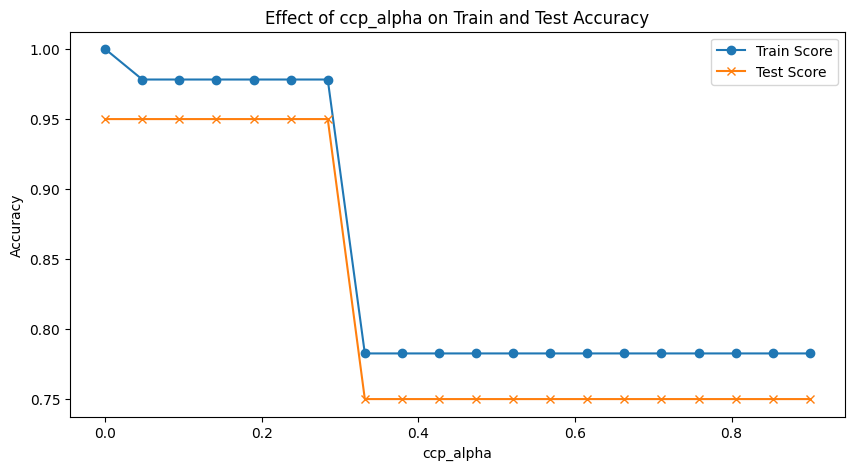

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train decision trees with different ccp_alphas
ccp_alphas = np.linspace(.9, 0, 20)
train_scores = []
test_scores = []

index = 0
for i,ccp_alpha in enumerate(ccp_alphas):
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    
    train_score = accuracy_score(y_train, clf.predict(X_train))
    test_score = accuracy_score(y_test, clf.predict(X_test))
    
    train_scores.append(train_score)
    test_scores.append(test_score)


plt.figure(figsize=(10, 5))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train Score')
plt.plot(ccp_alphas, test_scores, marker='x', label='Test Score')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Effect of ccp_alpha on Train and Test Accuracy')
plt.show()

In [8]:
test = test.drop(['author'], axis=1)

In [13]:
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=.2)
clf.fit(X, y)
clf.predict(test)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

## Exercise 3

Build a voting classifier for the federalist papers, using all of the non-ensemble methods you've been exposed to in this class thus far (i.e., KNN, SVM, logistic regression, naive bayes, SGDClassifier, decision tree).

1) Compare this to a RandomForest classifier.  Which works the best?
2) Compare this to a GradientBoosting classifier.  Which works the best?
3) Add the RandomForest and GradientBoosting classifiers to your voting classifier.  Does you performance improve?

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

data = load_wine()

# We'll use a data frame to make sure we get real feature names out
X = pd.DataFrame(data.data,columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


log_clf = LogisticRegression(random_state=42, solver='saga')
svm_clf = SVC(probability=True, random_state=42)
tree_clf = DecisionTreeClassifier(random_state=42)
knn_clf = KNeighborsClassifier()
nb_clf = GaussianNB()



voting_hard_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('svm', svm_clf), ('tree', tree_clf), ('knn', knn_clf), ('nb', nb_clf)],
    voting='hard')
voting_hard_clf.fit(X_train, y_train)

y_pred = voting_hard_clf.predict(X_test)
accuracy_score(y_test, y_pred)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.9444444444444444

In [17]:
log_clf = LogisticRegression(random_state=42, solver='saga')
knn_clf = KNeighborsClassifier()
nb_clf = GaussianNB()
svm_clf = SVC(probability=True, random_state=42)
tree_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()

voting_hard_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('knn', knn_clf), ('nb', nb_clf),('svm', svm_clf), ('tree', tree_clf),
                ('rf', rf_clf), ('gb', gb_clf)],
    voting='hard')
voting_hard_clf.fit(X_train, y_train)

y_pred = voting_hard_clf.predict(X_test)
accuracy_score(y_test, y_pred)


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.9722222222222222

## Exercise 4

When does it make sense to use a Bagging Classifier?  In the following, explore different data parameters to develop your intuition for which classifier makes sense in which situation. 

1. Gradually increase the noise in the data (using the noise parameter).  How do the different classifiers perform.  Why?


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=300, noise=.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
y_train_pred_tree = tree.predict(X_train)
print("Decision Tree Accuracy (train):", accuracy_score(y_train, y_train_pred_tree))
print("Decision Tree Accuracy (test):", accuracy_score(y_test, y_pred_tree))



log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_train_pred_log = log_reg.predict(X_train)
print("Logistic Regression Accuracy (train):", accuracy_score(y_train, y_train_pred_log))
print("Logistic Regression Accuracy (test):", accuracy_score(y_test, y_pred_log))

Decision Tree Accuracy (train): 1.0
Decision Tree Accuracy (test): 0.9866666666666667
Logistic Regression Accuracy (train): 0.8533333333333334
Logistic Regression Accuracy (test): 0.92


2.  Now, do the same thing in the following.  What do you notice. How do you explain your observations?

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

max_samples = 100

X, y = make_moons(n_samples=300, noise=.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

bag_tree = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, random_state=42,max_samples=max_samples)
bag_tree.fit(X_train, y_train)
y_pred_bag_train = bag_tree.predict(X_train)
y_pred_bag = bag_tree.predict(X_test)
print("Bagging Decision Tree Accuracy (train):", accuracy_score(y_train, y_pred_bag_train))
print("Bagging Decision Tree Accuracy (test):", accuracy_score(y_test, y_pred_bag))


bag_log = BaggingClassifier(LogisticRegression(), n_estimators=500, random_state=42,max_samples=max_samples)
bag_log.fit(X_train, y_train)
y_pred_bag_log_train = bag_log.predict(X_train)
y_pred_bag_log = bag_log.predict(X_test)
print("Bagging Logistic Regression Accuracy (train):", accuracy_score(y_train, y_pred_bag_log_train))
print("Bagging Logistic Regression Accuracy (test):", accuracy_score(y_test, y_pred_bag_log))

Bagging Decision Tree Accuracy (train): 0.9911111111111112
Bagging Decision Tree Accuracy (test): 0.9866666666666667
Bagging Logistic Regression Accuracy (train): 0.84
Bagging Logistic Regression Accuracy (test): 0.92


3. Now go back and start increasing the `max_samples` parameter.  How do things change? 

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

max_samples = 150

X, y = make_moons(n_samples=300, noise=.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

bag_tree = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, random_state=42,max_samples=max_samples)
bag_tree.fit(X_train, y_train)
y_pred_bag_train = bag_tree.predict(X_train)
y_pred_bag = bag_tree.predict(X_test)
print("Bagging Decision Tree Accuracy (train):", accuracy_score(y_train, y_pred_bag_train))
print("Bagging Decision Tree Accuracy (test):", accuracy_score(y_test, y_pred_bag))


bag_log = BaggingClassifier(LogisticRegression(), n_estimators=500, random_state=42,max_samples=max_samples)
bag_log.fit(X_train, y_train)
y_pred_bag_log_train = bag_log.predict(X_train)
y_pred_bag_log = bag_log.predict(X_test)
print("Bagging Logistic Regression Accuracy (train):", accuracy_score(y_train, y_pred_bag_log_train))
print("Bagging Logistic Regression Accuracy (test):", accuracy_score(y_test, y_pred_bag_log))

Bagging Decision Tree Accuracy (train): 0.9822222222222222
Bagging Decision Tree Accuracy (test): 0.92
Bagging Logistic Regression Accuracy (train): 0.84
Bagging Logistic Regression Accuracy (test): 0.88


## Exercise 5

The "wine" dataset contains data about the chemical makeup of different varieties of wine and critics scores.  Use XGBoost to build a classifier for this data.  Manually tune the hyperparameters of the XGBoost model to try to achieve better accuracy on the test set than the baseline model. Some hyperparameters to consider tweaking:
   - `learning_rate`
   - `max_depth`
   - `n_estimators`
   - `gamma`
   - `subsample`
   - `colsample_bytree`

See [the online docs](https://xgboost.readthedocs.io/en/stable/parameter.html) for more info.

After tuning, use the `plot_importance` function again to see if feature importances have changed after tuning.


1. How did hyperparameter tuning affect the model's accuracy? Which hyperparameters seemed to have the most influence?
2. Did feature importances change after tuning? If so, why might that be?

In [22]:
# Run this if you don't have XGBoost installed
%pip install XGBoost


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Baseline Accuracy: 0.9444


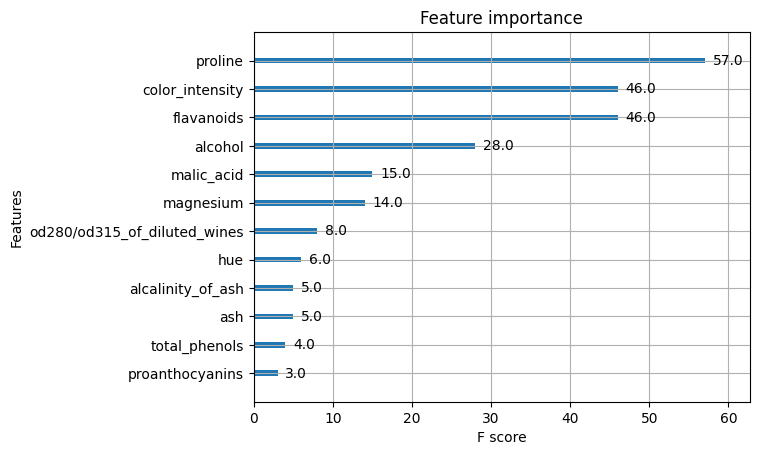

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import plot_importance

data = load_wine()

# We'll use a data frame to make sure we get real feature names out
X = pd.DataFrame(data.data,columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = xgb.XGBClassifier(objective='multi:softprob', random_state=42)
clf.fit(X_train, y_train)

baseline_accuracy = clf.score(X_test, y_test)
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")

plot_importance(clf)
plt.show()